In [45]:
import graphlab as gl
import matplotlib.pyplot as plt
gl.canvas.set_target('ipynb')
%matplotlib inline

In [46]:
### week2: Linear regression

In [47]:
houses = gl.SFrame('data/home_data.gl/')

In [48]:
houses.head().remove_columns(houses.column_names()[9:])

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [49]:
houses.show(view="Scatter Plot", x="sqft_living", y="price")

In [50]:
h_train, h_test = houses.random_split(.8, seed=0)
h_model = gl.linear_regression.create(h_train, target='price', features=['sqft_living']) #building model
h_model.evaluate(h_test) # test the model

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16540
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.011838     | 4353184.179492     | 3265242.

{'max_error': 4146348.7684038705, 'rmse': 255177.49885327066}

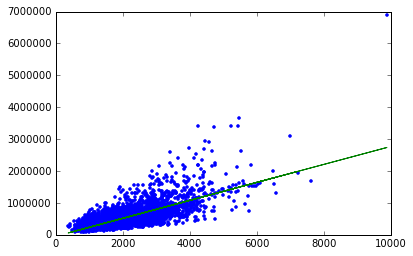

In [51]:
plt.plot(h_test['sqft_living'], h_test['price'], '.',
            h_test['sqft_living'], h_model.predict(h_test), '-')

In [52]:
h_model.get('coefficients')

name,index,value
(intercept),None,-45954.2241159
sqft_living,None,281.557680052


In [53]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
houses[features].show()

In [54]:
houses.show(view='BoxWhisker Plot', x='zipcode', y='price')

#### Mutli linear Model

In [55]:
h_multi_model = gl.linear_regression.create(h_train, target='price', features=features)
print h_model.evaluate(h_test)
print h_multi_model.evaluate(h_test)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16484
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.032465     | 3786214.824502     | 133663

In [56]:
house1 = houses[houses['id']=='5309101200']

In [57]:
print 'Real price of the house N°1 :',house1['price']
print 'Prediction of the linear model',h_model.predict(house1)
print 'Prediction of the multi linear model',h_multi_model.predict(house1)

Real price of the house N°1 : [620000, ... ]
Prediction of the linear model [629784.208008344]
Prediction of the multi linear model [726909.2053167247]


In [86]:
#### assignementq
qdf_1 = houses[houses['zipcode'] == '98039']
qdf_2 = houses[houses['sqft_living'] < 4000 and houses['sqft_living'] > 2000 ]
q_3 = 262944.07753184275 - 181943.7069860247

In [90]:
print 'the higthest mean by zipcode is: %f '%(qdf_1['price'].sum()/len(qdf_1))
print 'the proportion of hous beteween 2000 & 4000 is :%f .'%(len(qdf_2)/len(houses))
print 'the difference between linear & multi linear model are: %f'%q_3

the higthest mean by zipcode is: 2160606.600000 
the proportion of hous beteween 2000 & 4000 is :0.458104 .
the difference between linear & multi linear model are: 81000.370546


In [85]:
print h_model.evaluate(h_train)
print h_multi_model.evaluate(h_train)

{'max_error': 4353184.17949204, 'rmse': 262944.07753184275}
{'max_error': 3786214.82450202, 'rmse': 181943.7069860247}


In [ ]:
### week3: Classification

In [91]:
products = gl.SFrame('data/amazon_baby.gl/')
#  + a word count verctor
products['word_count'] = gl.text_analytics.count_words(products['review'])
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ..."


In [92]:
products['name'].show()

In [ ]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [ ]:
giraffe_reviews['rating'].show(view='Categorical')

In [ ]:
# ignoring the 3 stars ratings
products = products[products['rating'] != 3]
# defining good & bad ratinings
products['sentiment'] = products['rating'] >= 4
products.head()

In [ ]:
products_train, products_test = products.random_split(0.8, seed=0)

In [ ]:
sentiment_model = gl.logistic_classifier.create(products_train,
                                                target='sentiment',
                                                features=['word_count'],
                                                validation_set=products_test)

In [ ]:
sentiment_model.evaluate(products_test, metric='roc_curve')

In [ ]:
sentiment_model.show(view='Evaluation')

In [ ]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')

In [ ]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews

In [ ]:
### week4: Clustering

In [ ]:
people = gl.SFrame('data/people_wiki.gl/')

In [ ]:
people

In [ ]:
obama = people[people['name'] == 'Barack Obama']
clooney = people[people['name'] == 'George Clooney']

In [ ]:
obama['word_count'] = gl.text_analytics.count_words(obama['text'])
clooney['word_count'] = gl.text_analytics.count_words(clooney['text'])

In [ ]:
obama.head()

In [ ]:
obama_table = obama[['word_count']].stack('word_count', new_column_name = ['word','count'])
obama_table = obama_table.sort('count', ascending=False)
obama_table

In [ ]:
# Tf-idf for all people

In [ ]:
people['word_count'] = gl.text_analytics.count_words(people['text'])
tfidf = gl.text_analytics.tf_idf(people['word_count'])

In [ ]:
people['tfidf'] = tfidf

In [ ]:
people

In [ ]:
#people['tfidf'] = 

In [ ]:
obama = people[people['name'] == 'Barack Obama']
obama[['tfidf']].stack('tfidf', new_column_name = ['word','tfidf']).sort('tfidf', ascending=False)

In [ ]:
clinton = people[people['name'] == 'Bill Clinton']
beckham = people[people['name'] == 'David Beckham']

In [ ]:
gl.distances.cosine(obama['tfidf'][0],clinton['tfidf'][0])

In [ ]:
gl.distances.cosine(obama['tfidf'][0],beckham['tfidf'][0])

In [ ]:
#nearest table model

In [ ]:
knn_model = gl.nearest_neighbors.create(people, features=['tfidf'], label='name')

In [ ]:
knn_model.query(obama)

In [ ]:
swift = people[people['name'] == 'Taylor Swift']
jolie = people[people['name'] == 'Angelina Jolie']

In [ ]:
knn_model.query(swift)

In [ ]:
knn_model.query(jolie)

In [ ]:
### week5: Recommender System

In [11]:
song_data = gl.SFrame('data/song_data.gl/')
song_data.remove_columns(['title', 'artist']).head(4)

user_id,song_id,listen_count,song
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove - Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas - Paco DeLucia ...
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger - Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations - JackJohnson ...


In [12]:
song_data['song'].show()

In [19]:
users = song_data['user_id'].unique()

In [16]:
train_song, test_song = song_data.random_split(0.8, seed=0)

### Single popularity-based model

In [18]:
pop_model = gl.popularity_recommender.create(train_song, user_id='user_id', item_id='song')

PROGRESS: Recsys training: model = popularity
PROGRESS: Warning: Ignoring columns song_id, listen_count;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 893580 observations with 66085 users and 9952 items.
PROGRESS:     Data prepared in: 1.57485s
PROGRESS: 893580 observations to process; with 9952 unique items.


In [22]:
pop_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


### Recommender with personnalisation

In [23]:
perso_model = gl.item_similarity_recommender.create(train_song, user_id='user_id', item_id='song')

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Warning: Ignoring columns song_id, listen_count;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 893580 observations with 66085 users and 9952 items.
PROGRESS:     Data prepared in: 1.59758s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 9952 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 2.01248         |
PROGRESS: | 2000            | 2.10451         |
PROGRESS: | 3000            | 2.18542         |
PROGRESS: | 4000            | 2.28221         |
PROGRESS: | 5000            | 2.36615         |
PROGRESS: | 6000            | 2.44288         |
PROGRESS: | 7000            | 2.5276          |
PROGRESS: | 800

In [26]:
#prediction
perso_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.0194504525792,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.0144855208012,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.0142865986808,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Marry Me - Train,0.0141507931471,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.0136295309995,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,No Dejes Que... -Caifanes ...,0.0134191754754,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,0.0134126817414,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Y solo se me ocurreamarte (Unplugged) - ...,0.0133210385369,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Te Hacen Falta Vitaminas- Soda Stereo ...,0.0129302853556,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,0.0127892260976,10


In [27]:
perso_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.0375,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.0331632653061,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.0322580645161,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.0314159292035,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.0306772028826,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.0301204819277,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431137725,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.0230024907156,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.0193938442211,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.0189873417722,10


In [30]:
perso_model.get_similar_items(['With Or Without You - U2'])

PROGRESS: Getting similar items completed in 0.00211


song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.0428571428571,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734939759,2
With Or Without You - U2,Window In The Skies - U2,0.0328358208955,3
With Or Without You - U2,Vertigo - U2,0.0300751879699,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.0271317829457,5
With Or Without You - U2,Bad - U2,0.0251798561151,6
With Or Without You - U2,A Day Without Me - U2,0.0237154150198,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325203252,8
With Or Without You - U2,Walk On - U2,0.020202020202,9
With Or Without You - U2,Get On Your Boots - U2,0.0196850393701,10


In [32]:
perso_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

PROGRESS: Getting similar items completed in 0.002352


song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.188118811881,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.187192118227,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.184834123223,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.0214592274678,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.0205761316872,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019305019305,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.0191570881226,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.0187969924812,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.0187969924812,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779342723,10


In [33]:
### Comparaison between model

In [36]:
model_perf = gl.recommender.util.compare_models(test_song,[pop_model, perso_model])

PROGRESS: Evaluate model M0
PROGRESS: recommendations finished on 1000/58628 queries. users per second: 5495.89
PROGRESS: recommendations finished on 2000/58628 queries. users per second: 7802.41
PROGRESS: recommendations finished on 3000/58628 queries. users per second: 9345.94
PROGRESS: recommendations finished on 4000/58628 queries. users per second: 10191.2
PROGRESS: recommendations finished on 5000/58628 queries. users per second: 11072.6
PROGRESS: recommendations finished on 6000/58628 queries. users per second: 11421.6
PROGRESS: recommendations finished on 7000/58628 queries. users per second: 11862.5
PROGRESS: recommendations finished on 8000/58628 queries. users per second: 12046
PROGRESS: recommendations finished on 9000/58628 queries. users per second: 12379.3
PROGRESS: recommendations finished on 10000/58628 queries. users per second: 12639.9
PROGRESS: recommendations finished on 11000/58628 queries. users per second: 12532
PROGRESS: recommendations finished on 12000/58628 

[WARNING] Model trained without a target. Skipping RMSE computation.



PROGRESS: Evaluate model M1
PROGRESS: recommendations finished on 1000/58628 queries. users per second: 803.586
PROGRESS: recommendations finished on 2000/58628 queries. users per second: 805.22
PROGRESS: recommendations finished on 3000/58628 queries. users per second: 816.581
PROGRESS: recommendations finished on 4000/58628 queries. users per second: 878.022
PROGRESS: recommendations finished on 5000/58628 queries. users per second: 917.385
PROGRESS: recommendations finished on 6000/58628 queries. users per second: 935.508
PROGRESS: recommendations finished on 7000/58628 queries. users per second: 958.568
PROGRESS: recommendations finished on 8000/58628 queries. users per second: 969.642
PROGRESS: recommendations finished on 9000/58628 queries. users per second: 982.088
PROGRESS: recommendations finished on 10000/58628 queries. users per second: 986.688
PROGRESS: recommendations finished on 11000/58628 queries. users per second: 996.166
PROGRESS: recommendations finished on 12000/58

[WARNING] Model trained without a target. Skipping RMSE computation.
